In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the uploaded dataset from session storage
file_path = "/content/smallbank-1.csv"
data = pd.read_csv(file_path)

# Display dataset information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OPTIMIZE_IN_SELECT               1954 non-null   int64  
 1   OPTIMIZE_INSERT_FROM_SELECT      1954 non-null   int64  
 2   OPTIMIZE_TWO_EQUALS              1954 non-null   int64  
 3   OPTIMIZE_IN_LIST                 1954 non-null   int64  
 4   OPTIMIZE_EVALUATABLE_SUBQUERIES  1954 non-null   int64  
 5   PAGE_STORE_TRIM                  1954 non-null   int64  
 6   RECOMPILE_ALWAYS                 1954 non-null   int64  
 7   COMPRESS                         1954 non-null   int64  
 8   IGNORE_CATALOGS                  1954 non-null   int64  
 9   OPTIMIZE_OR                      1954 non-null   int64  
 10  PAGE_STORE_INTERNAL_COUNT        1954 non-null   int64  
 11  REUSE_SPACE                      1954 non-null   int64  
 12  DROP_R

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Selecting features and target (Assume last column is the target)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


Missing Values:
OPTIMIZE_IN_SELECT                 0
OPTIMIZE_INSERT_FROM_SELECT        0
OPTIMIZE_TWO_EQUALS                0
OPTIMIZE_IN_LIST                   0
OPTIMIZE_EVALUATABLE_SUBQUERIES    0
PAGE_STORE_TRIM                    0
RECOMPILE_ALWAYS                   0
COMPRESS                           0
IGNORE_CATALOGS                    0
OPTIMIZE_OR                        0
PAGE_STORE_INTERNAL_COUNT          0
REUSE_SPACE                        0
DROP_RESTRICT                      0
DEFRAG_ALWAYS                      0
OPTIMIZE_DISTINCT                  0
MVSTORE                            0
throughput                         0
dtype: int64


In [ ]:
# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


Model Evaluation:
MAE: 1117.4854
MAPE: 0.0570
RMSE: 1329.4662


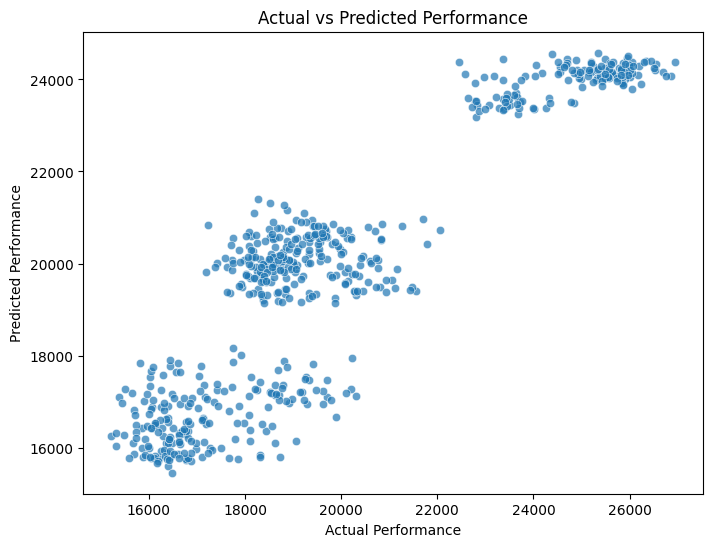

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance")
plt.show()

In [ ]:
# Descriptive Statistics
desc_stats = data.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
        OPTIMIZE_IN_SELECT  OPTIMIZE_INSERT_FROM_SELECT  OPTIMIZE_TWO_EQUALS  \
count         1954.000000                  1954.000000          1954.000000   
mean             0.562436                     0.504094             0.556807   
std              0.496213                     0.500111             0.496890   
min              0.000000                     0.000000             0.000000   
25%              0.000000                     0.000000             0.000000   
50%              1.000000                     1.000000             1.000000   
75%              1.000000                     1.000000             1.000000   
max              1.000000                     1.000000             1.000000   

       OPTIMIZE_IN_LIST  OPTIMIZE_EVALUATABLE_SUBQUERIES  PAGE_STORE_TRIM  \
count       1954.000000                      1954.000000      1954.000000   
mean           0.558342                         0.490788         0.203685   
std            0.496712         

In [ ]:
# Correlation Analysis
correlations = data.corr()["throughput"].sort_values(ascending=False)
print("\nFeature Correlations with Throughput:\n", correlations)


Feature Correlations with Throughput:
 throughput                         1.000000
MVSTORE                            0.690018
REUSE_SPACE                       -0.136656
OPTIMIZE_EVALUATABLE_SUBQUERIES   -0.148945
OPTIMIZE_TWO_EQUALS               -0.178709
DROP_RESTRICT                     -0.181824
OPTIMIZE_OR                       -0.186837
OPTIMIZE_DISTINCT                 -0.198639
OPTIMIZE_IN_SELECT                -0.208214
OPTIMIZE_IN_LIST                  -0.208691
IGNORE_CATALOGS                   -0.215498
DEFRAG_ALWAYS                     -0.234473
PAGE_STORE_TRIM                   -0.241678
OPTIMIZE_INSERT_FROM_SELECT       -0.253627
COMPRESS                          -0.331426
PAGE_STORE_INTERNAL_COUNT         -0.520338
RECOMPILE_ALWAYS                  -0.666578
Name: throughput, dtype: float64


In [ ]:
# Hypothesis Testing: ANOVA for categorical variables vs throughput
from scipy.stats import f_oneway

anova_results = {col: f_oneway(data[data[col] == 0]["throughput"], data[data[col] == 1]["throughput"]).pvalue
                 for col in data.columns[:-1]}
print("\nANOVA Test P-Values:\n", anova_results)



ANOVA Test P-Values:
 {'OPTIMIZE_IN_SELECT': np.float64(1.4025730134212193e-20), 'OPTIMIZE_INSERT_FROM_SELECT': np.float64(4.639849118940721e-30), 'OPTIMIZE_TWO_EQUALS': np.float64(1.7379947840630748e-15), 'OPTIMIZE_IN_LIST': np.float64(1.1426209161288033e-20), 'OPTIMIZE_EVALUATABLE_SUBQUERIES': np.float64(3.673228753233894e-11), 'PAGE_STORE_TRIM': np.float64(2.28941528514619e-27), 'RECOMPILE_ALWAYS': np.float64(2.383381086512164e-251), 'COMPRESS': np.float64(2.592693614643837e-51), 'IGNORE_CATALOGS': np.float64(5.789780276387616e-22), 'OPTIMIZE_OR': np.float64(8.283243603187741e-17), 'PAGE_STORE_INTERNAL_COUNT': np.float64(5.087055443185316e-136), 'REUSE_SPACE': np.float64(1.3166963029440647e-09), 'DROP_RESTRICT': np.float64(5.503983889311345e-16), 'DEFRAG_ALWAYS': np.float64(8.209344051560513e-26), 'OPTIMIZE_DISTINCT': np.float64(7.755493127754834e-19), 'MVSTORE': np.float64(2.421834830687611e-276)}


In [ ]:
# Decision Tree Model
X = data.drop(columns=["throughput"])
y = data["throughput"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Decision Tree
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 700208.5709485702


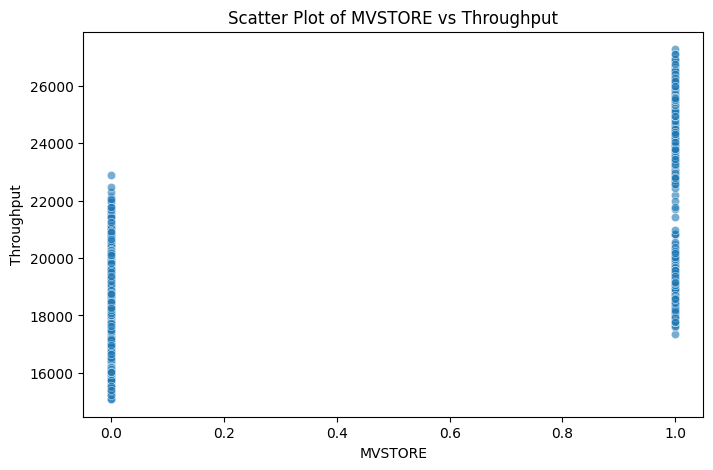

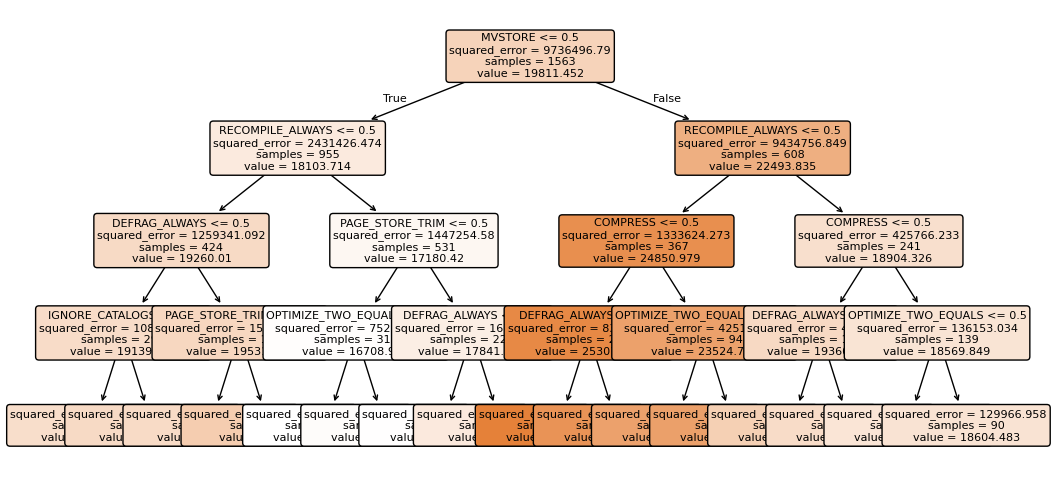

In [ ]:
# Scatter Plot: Selecting a feature with highest correlation
top_feature = correlations.index[1]  # Skipping 'throughput' itself
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data[top_feature], y=data["throughput"], alpha=0.6)
plt.xlabel(top_feature)
plt.ylabel("Throughput")
plt.title(f"Scatter Plot of {top_feature} vs Throughput")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()
